In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import json
import pandas as pd
import numpy as np
plotly.offline.init_notebook_mode(connected=True)

In [2]:
def seconds_to_datetime(seconds, ref='1900-01-01'):
    """ from seconds to datetime64 """
    seconds = np.asarray(seconds)
    return pd.to_datetime(seconds, unit='s', origin=ref)

In [3]:
with open('/users/staff/uvoggenberger/scratch/hug/config/active.json') as fp:
    active = json.load(fp)

In [4]:
activ_df = pd.DataFrame.from_dict(active, orient='index', columns=['ts', 'te', 'lat', 'lon', 'ct', 'path'])
activ_df = activ_df[((activ_df.te - activ_df.ts) > (60*60*24*365*10))] # show only station with t > 10a
activ_df.ts = seconds_to_datetime(activ_df.ts)
activ_df.te = seconds_to_datetime(activ_df.te)
activ_df.path = activ_df.path.str.rsplit(pat="/").str[-1]

In [5]:
activ_df['plot'] = list(zip(activ_df.ts, activ_df.te, activ_df.path))

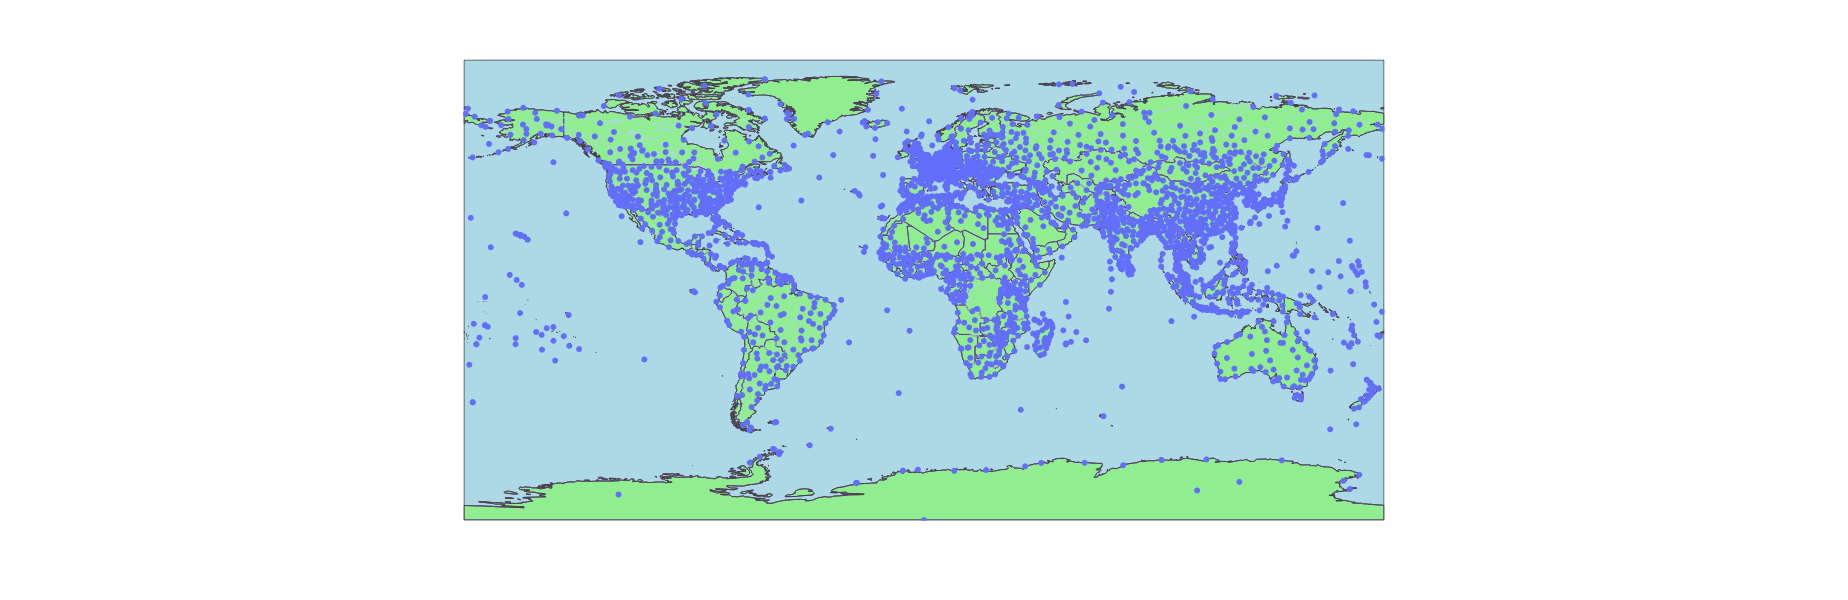

In [6]:
fig = px.scatter_geo(activ_df, lat='lat', lon='lon', hover_name='plot', width= 1000, height=600, )
fig.update_geos(
    resolution=50,
    showcountries=True, countrycolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="LightBlue",
    showrivers=True, rivercolor="LightBlue"
)
# fig.add_trace(go.Scatter(lat=[48.23], lon=[16.37], mode = 'markers',
#                          marker_symbol = 'star',
#                          marker_size = 10))

In [13]:
activ_df.index.values[1]

'0-124-0-73110'